<a href="https://colab.research.google.com/github/tushant-akar/CS367-Artifical-Intelligence-Lab/blob/main/Hopfield_Network_(Lab_6_Problem_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns

In [18]:
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))
        self.theoretical_capacity = int(0.15 * size)

    def train(self, patterns):
        self.patterns = patterns
        n_patterns = len(patterns)
        self.weights = np.zeros((self.size, self.size))

        for pattern in patterns:
            pattern = pattern.reshape(-1, 1)
            self.weights += np.outer(pattern, pattern)

        np.fill_diagonal(self.weights, 0)
        self.weights /= self.size

    def recall(self, pattern, max_iterations=1000, threshold=0):
        pattern = pattern.copy()
        energy_history = []

        for i in range(max_iterations):
            energy_history.append(self.calculate_energy(pattern))
            pattern_old = pattern.copy()

            for j in np.random.permutation(self.size):
                activation = np.dot(self.weights[j], pattern)
                pattern[j] = 1 if activation > threshold else -1

            if np.array_equal(pattern, pattern_old):
                break

        return pattern, energy_history, i + 1

    def calculate_energy(self, pattern):
        return -0.5 * pattern.dot(self.weights).dot(pattern)

    def calculate_overlap(self, pattern1, pattern2):
        return np.sum(pattern1 * pattern2) / self.size

In [19]:
def create_complex_patterns():
    patterns = {
        'A': np.array([
            [0,0,1,1,1,1,1,1,0,0],
            [0,1,1,1,1,1,1,1,1,0],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,1,1]
        ]),
        'B': np.array([
            [1,1,1,1,1,1,1,1,0,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,1,1,1,1,1,1,0,0],
            [1,1,1,1,1,1,1,1,0,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,1,1,1,1,1,1,0,0]
        ]),
        'C': np.array([
            [0,0,1,1,1,1,1,1,0,0],
            [0,1,1,1,1,1,1,1,1,0],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,1,1],
            [0,1,1,1,1,1,1,1,1,0],
            [0,0,1,1,1,1,1,1,0,0]
        ])
    }

    return {k: (2*v - 1).flatten() for k, v in patterns.items()}

In [20]:
def add_noise(pattern, noise_level=0.2):
    noisy = pattern.copy()
    n_flip = int(len(pattern) * noise_level)
    flip_idx = np.random.choice(len(pattern), n_flip, replace=False)
    noisy[flip_idx] *= -1
    return noisy

In [21]:
def plot_comprehensive_results(original_patterns, noisy_patterns, recovered_patterns,
                             energy_histories, iterations, overlaps):
    n_patterns = len(original_patterns)
    fig = plt.figure(figsize=(15, 5*n_patterns))

    for idx, (key, original) in enumerate(original_patterns.items()):
        ax1 = plt.subplot2grid((n_patterns, 4), (idx, 0))
        ax2 = plt.subplot2grid((n_patterns, 4), (idx, 1))
        ax3 = plt.subplot2grid((n_patterns, 4), (idx, 2))
        ax4 = plt.subplot2grid((n_patterns, 4), (idx, 3))

        ax1.imshow(original.reshape(10, 10), cmap='binary')
        ax1.set_title(f'Original Pattern {key}')
        ax1.axis('off')

        ax2.imshow(noisy_patterns[key].reshape(10, 10), cmap='binary')
        ax2.set_title(f'Noisy Pattern {key}\n({noise_level*100}% noise)')
        ax2.axis('off')

        ax3.imshow(recovered_patterns[key].reshape(10, 10), cmap='binary')
        ax3.set_title(f'Recovered Pattern {key}\n(Overlap: {overlaps[key]:.2%})')
        ax3.axis('off')

        ax4.plot(energy_histories[key], 'b-')
        ax4.set_title(f'Energy Evolution\n({iterations[key]} iterations)')
        ax4.set_xlabel('Iterations')
        ax4.set_ylabel('Energy')
        ax4.grid(True)

    plt.tight_layout()
    plt.show()

In [22]:
def print_detailed_analysis(network, original_patterns, recovered_patterns,
                          iterations, energy_histories, overlaps):
    print("\n" + "="*60)
    print("HOPFIELD NETWORK DETAILED ANALYSIS")
    print("="*60)

    print(f"\nNetwork Configuration:")
    print(f"Network Size: {network.size} neurons")
    print(f"Theoretical Capacity: {network.theoretical_capacity} patterns")
    print(f"Number of Stored Patterns: {len(original_patterns)}")

    print("\nRecovery Analysis:")
    for key in original_patterns.keys():
        print(f"\nPattern {key}:")
        print(f"  Iterations to Convergence: {iterations[key]}")
        print(f"  Initial Energy: {energy_histories[key][0]:.2f}")
        print(f"  Final Energy: {energy_histories[key][-1]:.2f}")
        print(f"  Pattern Overlap: {overlaps[key]:.2%}")

    cross_correlation = np.zeros((len(original_patterns), len(original_patterns)))
    pattern_keys = list(original_patterns.keys())

    for i, key1 in enumerate(pattern_keys):
        for j, key2 in enumerate(pattern_keys):
            cross_correlation[i,j] = network.calculate_overlap(
                original_patterns[key1], original_patterns[key2])

    print("\nPattern Cross-Correlation Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cross_correlation,
                annot=True,
                fmt='.2f',
                xticklabels=pattern_keys,
                yticklabels=pattern_keys,
                cmap='coolwarm')
    plt.title('Pattern Cross-Correlation Matrix')
    plt.show()

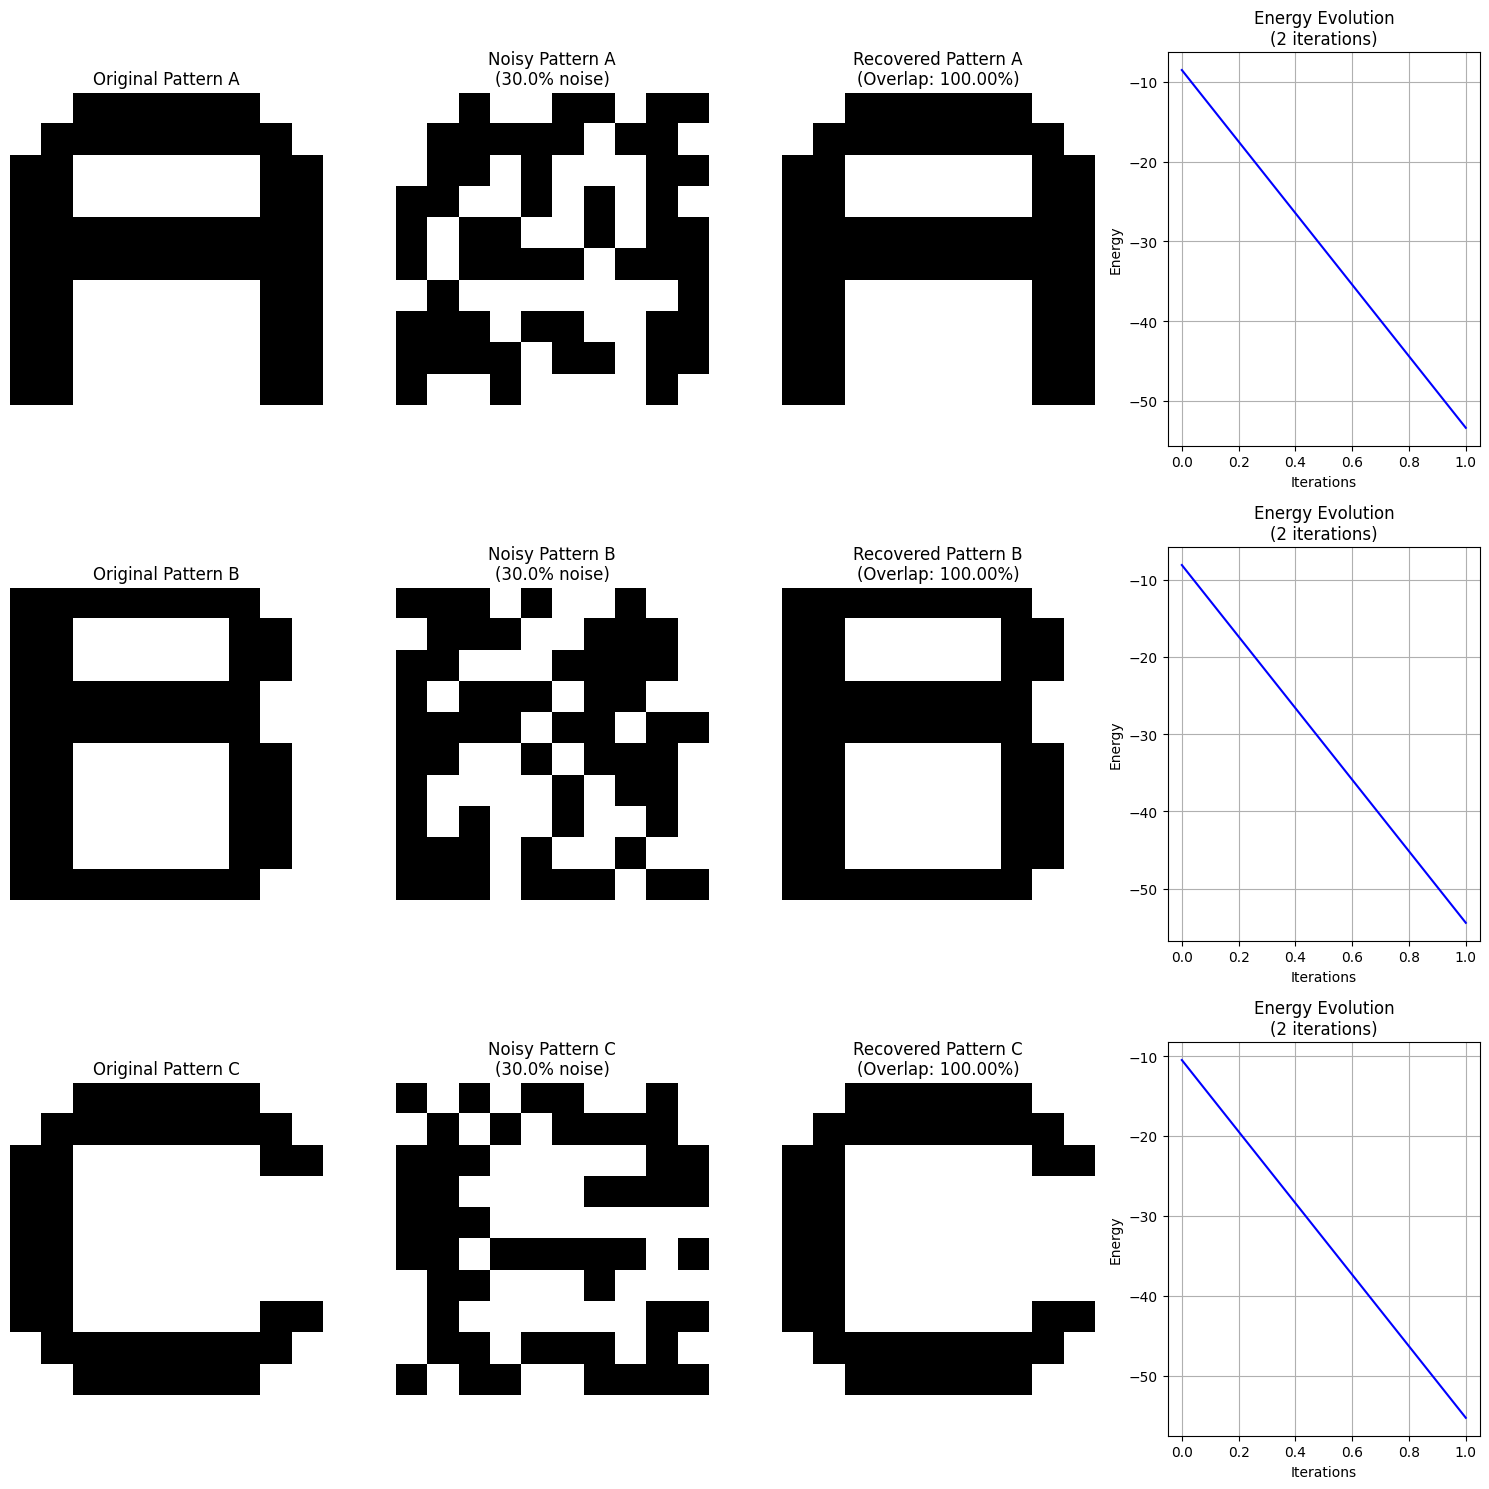


HOPFIELD NETWORK DETAILED ANALYSIS

Network Configuration:
Network Size: 100 neurons
Theoretical Capacity: 15 patterns
Number of Stored Patterns: 3

Recovery Analysis:

Pattern A:
  Iterations to Convergence: 2
  Initial Energy: -8.50
  Final Energy: -53.38
  Pattern Overlap: 100.00%

Pattern B:
  Iterations to Convergence: 2
  Initial Energy: -8.10
  Final Energy: -54.42
  Pattern Overlap: 100.00%

Pattern C:
  Iterations to Convergence: 2
  Initial Energy: -10.50
  Final Energy: -55.30
  Pattern Overlap: 100.00%

Pattern Cross-Correlation Matrix:


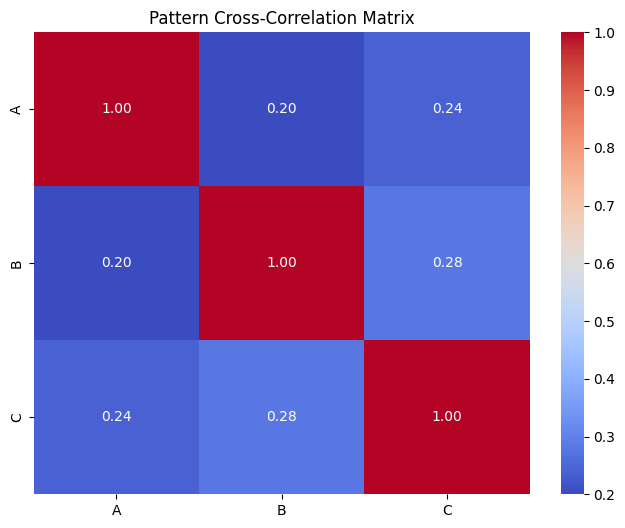

In [25]:
if __name__ == "__main__":
    size = 100  # 10x10 grid
    network = HopfieldNetwork(size)

    patterns = create_complex_patterns()
    network.train(list(patterns.values()))

    noise_level = 0.3

    noisy_patterns = {}
    recovered_patterns = {}
    energy_histories = {}
    iterations = {}
    overlaps = {}

    for key, pattern in patterns.items():
        noisy_patterns[key] = add_noise(pattern, noise_level)

        recovered, energy_history, iters = network.recall(noisy_patterns[key])
        recovered_patterns[key] = recovered
        energy_histories[key] = energy_history
        iterations[key] = iters

        overlaps[key] = network.calculate_overlap(pattern, recovered)

    plot_comprehensive_results(patterns, noisy_patterns, recovered_patterns,
                             energy_histories, iterations, overlaps)

    print_detailed_analysis(network, patterns, recovered_patterns,
                          iterations, energy_histories, overlaps)